In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from lfpan import *
from loaders import StabilityDurationRecording, LFPRecording, StabilityRecording

plt.style.use('pcb')

In [2]:
mean_kdes, mean_lfps, tt = get_means()

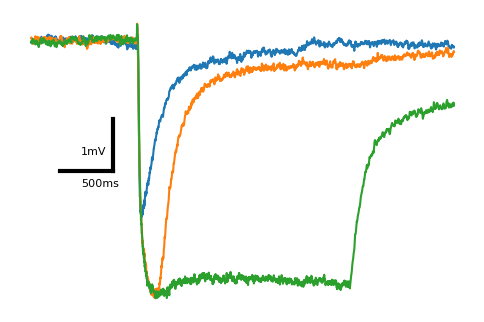

In [3]:
fig, ax = plt.subplots()

def plot_means(ax, vert_shift_x=-0.3, vert_shift_y=0.3, hor_shift_x=-0.3, hor_shift_y=-0.3):
    for dur in [0.02, 0.2, 2]:
        ax.plot(tt, mean_lfps[dur], label=f'{dur*1000:.0f}ms')

    plot_scalebar(ax, (-0.23, -2.5),
              vertical=dict(
                  size=1,
                  x=vert_shift_x,
                  y=vert_shift_y,
                  text='1mV'),
              horizontal=dict(
                  size=-0.5,
                  x=hor_shift_x,
                  y=hor_shift_y,
                  text='500ms'))
    
    despine_ax(ax)
    
plot_means(ax)

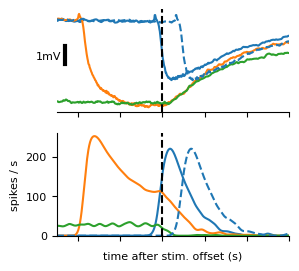

In [4]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(3,3))

def plot_lfp_comparison(axes, scalebarxshift=-0.07, colors=None, reverse=False):
    if colors is None:
        colors = ['C0','C1','C2']
        
    norm_vals = []
    
    if reverse is False:
        ax_firing = axes[0]
        ax_lfp = axes[1]
    else:
        ax_firing = axes[1]
        ax_lfp = axes[0]

    for i, dur in enumerate([0.02, 0.2, 2]):
        start_ix = np.argmin(np.abs(tt-dur+0.05))
        end_ix = np.argmin(np.abs(tt-dur))
        norm_vals.append(mean_kdes[dur][start_ix:end_ix].mean())
        
        label_str = f'{dur*1000:.0f}ms'
        
        ax_firing.plot(tt-dur, mean_kdes[dur], c=colors[i], label=label_str)
        ax_lfp.plot(tt-dur, mean_lfps[dur], c=colors[i], label=label_str)

    # axes[0].plot(kde_xx-dur, mean_kdes[dur] + 80, c='C2', linestyle='dashed')

    dur = 0.02
    ax_firing.plot(tt-dur+0.05, mean_kdes[dur], c=colors[0], linestyle='dashed')
    ax_lfp.plot(tt-dur+0.05, mean_lfps[dur], c=colors[0], linestyle='dashed')

    
    for ax in axes:
        ax.set_xlim(-.25,0.3)
    axes[0].axvline(0, color='black', linestyle='dashed')
    axes[1].axvline(0, color='black', linestyle='dashed')
    ax_firing.set_ylim(0, 260)
    
    ax_firing.set_ylabel('spikes / s')
    axes[1].set_xlabel('time after stim. offset (s)')
    ax_lfp.spines['left'].set_visible(False)
    ax_lfp.set_yticks([])
    axes[0].set_xticklabels([])
#     axes[1].plot([-0.22,-0.22], [-1.5,-2.5], color='black', lw=3)
    
    plot_scalebar(ax_lfp, (-0.23, -2.5),
              vertical=dict(
                  size=1,
                  x=scalebarxshift,
                  y=0.3,
                  text='1mV'))
    
plot_lfp_comparison(axes, reverse=True)

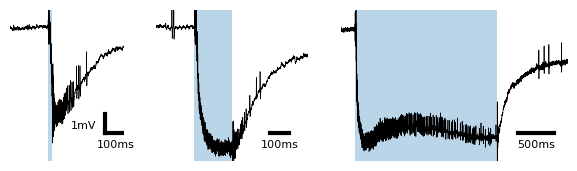

In [5]:
def plot_traces(axes):
    txt_files, abf_files = intact_files()
    
    file_ix = 23
    rec = StabilityDurationRecording(txt_files[file_ix], abf_files[file_ix], filtered=False)

    xlims = [(-0.2, 0.4), (-0.2, 0.6), (-0.2, 3)]

    for dur, ax, xlim in zip([0.02, 0.2, 2], axes, xlims):
        sresp, lresp = rec[dur][0]

        tarr, varr = lresp.to_arrays()
        tarr = tarr - sresp.stim_start
        varr = varr - varr[0]
        ax.plot(tarr, varr, lw=0.5, color='black')
        ax.set_xlim(xlim)
        ax.set_ylim(-7, 1)
        despine_ax(ax, remove_ticks=True)
        ax.axvspan(0,dur, alpha=0.3)

    plot_scalebar(axes[0], (0.3, -5.5),
                  vertical=dict(
                      size=1,
                      x=-0.18,
                      y=0.2,
                      text='1mV'),
                  horizontal=dict(
                      size=0.1,
                      x=-0.04,
                      y=-0.8,
                      text='100ms'))

    plot_scalebar(axes[1], (0.4, -5.5),
                  horizontal=dict(
                      size=0.1,
                      x=-0.05,
                      y=-0.8,
                      text='100ms'))

    plot_scalebar(axes[2], (2.3, -5.5),
                  horizontal=dict(
                      size=0.5,
                      x=-0.02,
                      y=-0.8,
                      text='500ms'))

fig, axes = plt.subplots(ncols=3, figsize=(7.2,2), gridspec_kw={'width_ratios': [1.5,2,3]})
plot_traces(axes)

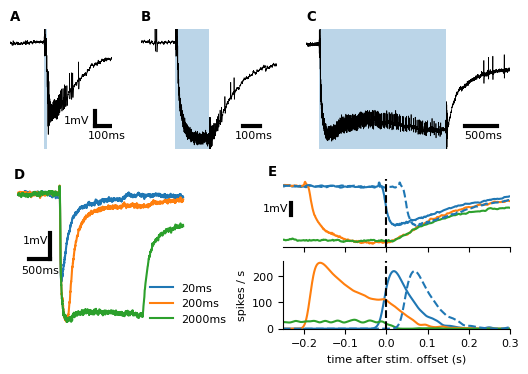

In [6]:
fig = plt.figure(figsize=(5, 3))

gs_top = fig.add_gridspec(1,3, top=1, bottom=0.6, left=0, right=1, width_ratios=[1.5,2,3])
axes = [fig.add_subplot(gs_top[i]) for i in range(3)]
plot_traces(axes)

axes[0].set_title('A', weight='bold', loc='left')
axes[1].set_title('B', weight='bold', loc='left')
axes[2].set_title('C', weight='bold', loc='left')

gs_bottom = fig.add_gridspec(2,2, top=0.5, bottom=0.0, left=0, right=1, width_ratios=[0.8,1], wspace=0.45)

ax_full_lfp = fig.add_subplot(gs_bottom[:,0])
ax0_ends = fig.add_subplot(gs_bottom[0,1])
ax1_ends = fig.add_subplot(gs_bottom[1,1])

ax0_ends.set_title('E', fontweight='bold', x=-0.05, y=0.93)

plot_lfp_comparison([ax0_ends, ax1_ends], scalebarxshift=-0.07, reverse=True)
plot_means(ax_full_lfp, vert_shift_x=-0.65, vert_shift_y=0.6, hor_shift_x=-0.7, hor_shift_y=-0.55)
ax_full_lfp.set_title('D', fontweight='bold', x=0.05, y=0.95)

ax_full_lfp.legend(frameon=False, loc=(0.75,0))

# plt.savefig('img/lfp_figure.png')